In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Import cleaned SF crime dataset

In [14]:
p0 = pd.read_csv('p0.csv')
p0.head()

,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,...,IncidentID,CAD_Num,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Subcategory,Police District,Analysis Neighborhood,Supervisor District
0,46668,180000417,ASSAULT,BATTERY,Sunday,2017-12-31,23:58,SOUTHERN,NONE,800 Block of BRYANT ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46669,180000069,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Sunday,2017-12-31,23:56,TENDERLOIN,"ARREST, BOOKED",500 Block of JONES ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46672,186005077,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,23:55,MISSION,NONE,500 Block of VALENCIA ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46673,176001461,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,2017-12-31,23:50,SOUTHERN,NONE,700 Block of HARRISON ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46674,180000025,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Sunday,2017-12-31,23:46,NORTHERN,"ARREST, BOOKED",HEMLOCK ST / POLK ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
p0.shape

(1822068, 31)

In [59]:
p0.isnull().sum()

Unnamed: 0                            0
IncidntNum                            0
Category                              8
Descript                              0
DayOfWeek                             0
Date                                  0
Time                                  0
PdDistrict                       110714
Resolution                            0
Address                            6415
X                                  6415
Y                                  6415
Location                           6415
PdId                             110713
SF Find Neighborhoods             13495
Current Police Districts           7489
Current Supervisor Districts       6940
Analysis Neighborhoods             7276
Year                            1711355
Report_Datetime                 1711355
RowID                           1711355
IncidentID                      1711355
CAD_Num                         1742753
Report Type Code                1711355
Report Type Description         1711355


## To count the frequency of timing, locations & status of the crimes

In [16]:
p0_dayofweek = p0.DayOfWeek.value_counts()
p0_dayofweek

Friday       281015
Saturday     265328
Wednesday    265323
Thursday     260295
Tuesday      257803
Monday       251129
Sunday       241175
Name: DayOfWeek, dtype: int64

In [18]:
p0_dayofweek_pct = p0.DayOfWeek.value_counts(normalize=True)
p0_dayofweek_pct

Friday       0.154229
Saturday     0.145619
Wednesday    0.145616
Thursday     0.142857
Tuesday      0.141489
Monday       0.137826
Sunday       0.132363
Name: DayOfWeek, dtype: float64

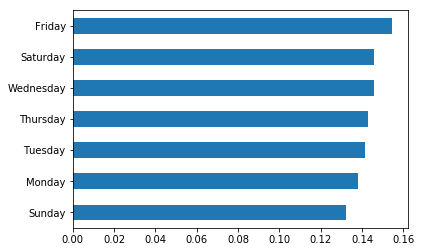

In [58]:
p0_dayofweek_pct.plot('barh').invert_yaxis()

### The bar chart shows that the number of crimes each day of the week doesn't vary much. Friday, Saturday and Wednesday are the days with most crimes. Sunday has least crimes.

In [30]:
p0_resolution = p0.Resolution.value_counts().head(10)
p0_resolution

NONE                    1194921
ARREST, BOOKED           274879
ARREST, CITED            135465
Open or Active            92878
PSYCHOPATHIC CASE         26749
LOCATED                   24197
UNFOUNDED                 17836
Cite or Arrest Adult      16608
JUVENILE BOOKED            6864
NOT PROSECUTED             6534
Name: Resolution, dtype: int64

In [34]:
p0_resolution_pct = p0.Resolution.value_counts(normalize=True).head(10)
p0_resolution_pct

NONE                    0.655805
ARREST, BOOKED          0.150861
ARREST, CITED           0.074347
Open or Active          0.050974
PSYCHOPATHIC CASE       0.014681
LOCATED                 0.013280
UNFOUNDED               0.009789
Cite or Arrest Adult    0.009115
JUVENILE BOOKED         0.003767
NOT PROSECUTED          0.003586
Name: Resolution, dtype: float64

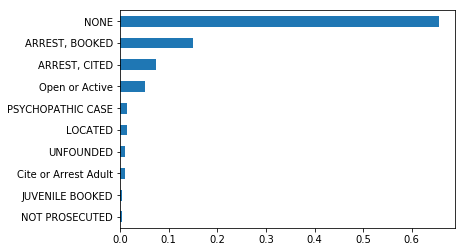

In [39]:
p0_resolution_pct.plot('barh').invert_yaxis()

## The above chart showed that the resolution of over 65% of crimes were unknown. For those that actions had been taken, most of cases show that arrests were booked or cited.

In [46]:
p0['Date'] = pd.to_datetime(p0.Date)

In [51]:
p0_month = p0.Date.dt.month.value_counts()
p0_month

10    159978
8     158083
3     155102
1     154863
7     154638
5     154412
9     154169
4     150370
6     148033
11    146973
12    144942
2     140505
Name: Date, dtype: int64

In [53]:
p0_month_pct = p0.Date.dt.month.value_counts(normalize=True)
p0_month_pct

10    0.087800
8     0.086760
3     0.085124
1     0.084993
7     0.084869
5     0.084745
9     0.084612
4     0.082527
6     0.081244
11    0.080663
12    0.079548
2     0.077113
Name: Date, dtype: float64

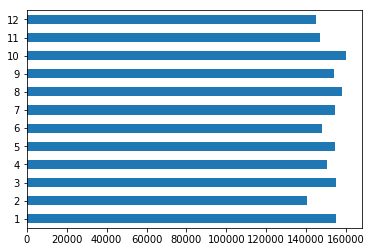

In [55]:
p0.Date.dt.month.value_counts().sort_index().plot('barh')

## <span style='color:red'> Question1: Since each month has different number of days, how do I calculate the daily average for each month?

## The bar chart shows that October and August have most crimes. December and November have least crimes. Feb seems to have least crimes, but it only has 28-29 days. After we averages it out, it ranks 4th place in the list.

In [61]:
p0_location = p0.Location.value_counts().head(10)
p0_location

(37.775420706711, -122.403404791479)      47547
(37.7564864109309, -122.406539115148)      7005
(37.775420706711, -122.40340479147905)     6780
(37.7841893501425, -122.407633520742)      5255
(37.7642205603745, -122.41965834371)       5039
(37.7650501214668, -122.419671780296)      4894
(37.7725405391593, -122.466204667893)      3872
(37.7850629421661, -122.406520987144)      3856
(37.7285280627465, -122.475647460786)      3367
(37.7256933575703, -122.452289660492)      3138
Name: Location, dtype: int64

In [62]:
p0_location_pct = p0.Location.value_counts(normalize=True).head(10)
p0_location_pct

(37.775420706711, -122.403404791479)      0.026187
(37.7564864109309, -122.406539115148)     0.003858
(37.775420706711, -122.40340479147905)    0.003734
(37.7841893501425, -122.407633520742)     0.002894
(37.7642205603745, -122.41965834371)      0.002775
(37.7650501214668, -122.419671780296)     0.002695
(37.7725405391593, -122.466204667893)     0.002133
(37.7850629421661, -122.406520987144)     0.002124
(37.7285280627465, -122.475647460786)     0.001854
(37.7256933575703, -122.452289660492)     0.001728
Name: Location, dtype: float64

## <span style='color:red'>Question 2: How do I map the "Location" to "Address" in words in the table, instead of showing them in latitude and longitude?

## Weather Datasets: We found daily temperature in CA from 2014 to 2018. We will use the average temperature column 'TAVG' for analysis. Dateset source: https://www.ncdc.noaa.gov/cdo-web/search

In [63]:
temp1 = pd.read_csv('Temprature2014_2018.csv')
temp1.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TOBS,WT01,WT02,WT03,WT05,WT08,WT09,WT11
0,US1CAAL0039,"BERKELEY 0.9 SSE, CA US",2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1CAAL0039,"BERKELEY 0.9 SSE, CA US",2017-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1CAAL0039,"BERKELEY 0.9 SSE, CA US",2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1CAAL0039,"BERKELEY 0.9 SSE, CA US",2017-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1CAAL0039,"BERKELEY 0.9 SSE, CA US",2017-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#By listing all the weather stations in CA, we'll identify the one that's closest to SF city.
temp1['NAME'].unique()

array(['BERKELEY 0.9 SSE, CA US', 'SPRING VALLEY CALIFORNIA, CA US',
       'PALO ALTO 1.2 NE, CA US', 'AMERICAN CANYON 3.5 NE, CA US',
       'HALF MOON BAY, CA US', 'NEWARK, CA US', 'MUIR WOODS, CA US',
       'AMERICAN CANYON 0.3 S, CA US', 'BLACK DIAMOND CALIFORNIA, CA US',
       'WOODSIDE FIRE STATION 1, CA US', 'EAST PALO ALTO 0.3 WSW, CA US',
       'SAN MATEO 0.8 NE, CA US', 'PACIFICA 1.9 S, CA US',
       'LAFAYETTE 0.7 E, CA US', 'SAN FRANCISCO OCEANSIDE, CA US',
       'WALNUT CREEK 1.7 SSE, CA US', 'MARTINEZ 0.8 SSE, CA US',
       'SAN RAFAEL CIVIC CEN, CA US', 'BERKELEY, CA US',
       'BRIONES CALIFORNIA, CA US', 'SAN FRANCISCO DOWNTOWN, CA US',
       'MARTINEZ 2.2 SW, CA US', 'BARNABY CALIFORNIA, CA US',
       'LAFAYETTE 1.9 WSW, CA US', 'OAKLAND NORTH CALIFORNIA, CA US',
       'WOODSIDE 3.4 S, CA US', 'OAKLAND SOUTH CALIFORNIA, CA US',
       'REDWOOD CITY 3.3 SSW, CA US', 'WALNUT CREEK 1.4 NE, CA US',
       'WALNUT CREEK 1.4 SSE, CA US', 'SAN RAFAEL 3.7 WNW, CA U

In [65]:
## We selected the area of 'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US' for analysis
df_temp1 = temp1.loc[[i for i in range(len(temp1))],['NAME', 'DATE','TAVG']]
df_temp1.head()

,NAME,DATE,TAVG
0,"BERKELEY 0.9 SSE, CA US",2017-07-01,NaN
1,"BERKELEY 0.9 SSE, CA US",2017-07-02,NaN
2,"BERKELEY 0.9 SSE, CA US",2017-07-03,NaN
3,"BERKELEY 0.9 SSE, CA US",2017-07-04,NaN
4,"BERKELEY 0.9 SSE, CA US",2017-07-06,NaN


In [69]:
# To create a dataframe for temperatures in SF city of 5 years from 2014 to 2018
sf_temp = df_temp1[df_temp1['NAME']=='SAN FRANCISCO INTERNATIONAL AIRPORT, CA US']
sf_temp.head()

,NAME,DATE,TAVG
125654,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-01,49.0
125655,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-02,51.0
125656,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-03,52.0
125657,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-04,53.0
125658,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",2014-01-05,55.0


## <span style='color:red'> Question 3: How do I show this graph together with the number of crimes on each day, to find out if there's correlation between temperature and number of crimes?